## Proyecto 1 

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, TSNE, SpectralEmbedding, Isomap, MDS
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import PowerTransformer

In [2]:
df_stations = pd.read_csv('data/stations.csv')
df_stations.head()

,id,lat,lon,name
0,1,19.433571,-99.167809,1 RIO SENA-RIO BALSAS
1,2,19.431386,-99.171695,2 RIO GUADALQUIVIR-RIO BALSAS
2,3,19.431655,-99.158668,3 REFORMA-INSURGENTES
3,4,19.428309,-99.171713,4 RIO NILO-RIO PANUCO
4,5,19.429720,-99.169363,5 RIO PANUCO-RIO TIBER


In [3]:
df_stations.columns

Index(['id', 'lat', 'lon', 'name'], dtype='object')

In [4]:
df = pd.read_csv('data/ecobici_2023_08.csv')
df.head()


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21


In [5]:
len(df)

1109195

## Crear Dataset

In [6]:
df['Datetime_Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'], format='%d/%m/%Y %H:%M:%S')
df['Datetime_Arribo'] = pd.to_datetime(df['Fecha Arribo'] + ' ' + df['Hora_Arribo'], format='%d/%m/%Y %H:%M:%S')



df['Tiempo_de_uso'] = (df['Datetime_Arribo'] - df['Datetime_Retiro']).dt.total_seconds() / 60  

In [7]:
df.head(100)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Datetime_Retiro,Datetime_Arribo,Tiempo_de_uso
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03,2023-07-31 23:52:38,2023-08-01 00:00:03,7.416667
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20,2023-07-31 23:48:01,2023-08-01 00:00:20,12.316667
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30,2023-07-31 23:55:50,2023-08-01 00:00:30,4.666667
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08,2023-07-31 23:32:42,2023-08-01 00:01:08,28.433333
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21,2023-07-31 23:51:09,2023-08-01 00:01:21,10.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,29.0,5310842,258,01/08/2023,00:04:11,369,01/08/2023,00:29:25,2023-08-01 00:04:11,2023-08-01 00:29:25,25.233333
96,M,16.0,7402217,015,01/08/2023,00:24:48,006,01/08/2023,00:29:41,2023-08-01 00:24:48,2023-08-01 00:29:41,4.883333
97,M,46.0,5514278,015,01/08/2023,00:23:18,006,01/08/2023,00:30:04,2023-08-01 00:23:18,2023-08-01 00:30:04,6.766667
98,M,21.0,2998797,016,01/08/2023,00:13:17,181,01/08/2023,00:30:07,2023-08-01 00:13:17,2023-08-01 00:30:07,16.833333


In [8]:
df['Genero_Usuario'] = df['Genero_Usuario'].map({'F':0, 'M':1})

In [9]:
df['Ciclo_Estacion_Retiro'] = pd.to_numeric(df['Ciclo_Estacion_Retiro'], errors = 'coerce')
df.dropna(inplace=True)
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(int)

In [10]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Datetime_Retiro,Datetime_Arribo,Tiempo_de_uso
0,1.0,24.0,2252039,7,31/07/2023,23:52:38,064,01/08/2023,00:00:03,2023-07-31 23:52:38,2023-08-01 00:00:03,7.416667
1,1.0,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20,2023-07-31 23:48:01,2023-08-01 00:00:20,12.316667
2,1.0,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30,2023-07-31 23:55:50,2023-08-01 00:00:30,4.666667
3,0.0,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08,2023-07-31 23:32:42,2023-08-01 00:01:08,28.433333
4,0.0,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21,2023-07-31 23:51:09,2023-08-01 00:01:21,10.200000


In [11]:
df['Ciclo_EstacionArribo'] = pd.to_numeric(df['Ciclo_EstacionArribo'], errors = 'coerce')
df.dropna(inplace=True)
df['Ciclo_EstacionArribo'] = df['Ciclo_EstacionArribo'].astype(int)

In [12]:
df2 = df.merge(df_stations, left_on='Ciclo_Estacion_Retiro', right_on='id', how='left')

In [13]:
df2 = df2.merge(df_stations, left_on='Ciclo_EstacionArribo', right_on='id', how='left')

In [14]:
df2.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Datetime_Retiro,Datetime_Arribo,Tiempo_de_uso,id_x,lat_x,lon_x,name_x,id_y,lat_y,lon_y,name_y
0,1.0,24.0,2252039,7,31/07/2023,23:52:38,64,01/08/2023,00:00:03,2023-07-31 23:52:38,2023-08-01 00:00:03,7.416667,7.0,19.425468,-99.175166,7 RIO ELBA-RIO LERMA,64.0,19.412877,-99.166986,64 SONORA-AMSTERDAM
1,1.0,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20,2023-07-31 23:48:01,2023-08-01 00:00:20,12.316667,206.0,19.435798,-99.201419,206 MOLIERE-HOMERO,212.0,19.433567,-99.188096,212 HEGEL-HORACIO
2,1.0,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30,2023-07-31 23:55:50,2023-08-01 00:00:30,4.666667,215.0,19.433840,-99.199680,215 EDGAR ALAN POE-HORACIO,212.0,19.433567,-99.188096,212 HEGEL-HORACIO
3,0.0,30.0,2036523,291,31/07/2023,23:32:42,82,01/08/2023,00:01:08,2023-07-31 23:32:42,2023-08-01 00:01:08,28.433333,291.0,19.397651,-99.169946,291 MAGDALENA-DIVISIÓN DEL NORTE,82.0,19.433115,-99.143686,82 INDEPENDENCIA-MARROQUI
4,0.0,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21,2023-07-31 23:51:09,2023-08-01 00:01:21,10.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia en kilómetros entre dos puntos en la Tierra (especificados en grados decimales).
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Conversión de coordenadas a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Diferencias en coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula de Haversine
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # Distancia total
    distance = R * c
    
    return distance

In [16]:
# Coordenadas del Foro Sol y el Centro de la Ciudad de México
foro_sol_lat, foro_sol_lon = 19.4042, -99.0915
centro_cdmx_lat, centro_cdmx_lon = 19.4326, -99.1332

# Calcula la distancia al Foro Sol
df2['Distancia_Foro_Sol'] = df2.apply(lambda x: haversine(x['lat_x'], x['lon_x'], foro_sol_lat, foro_sol_lon), axis=1)

# Calcula la distancia al Centro de la Ciudad de México
df2['Distancia_Centro_CDMX'] = df2.apply(lambda x: haversine(x['lat_x'], x['lon_x'], centro_cdmx_lat, centro_cdmx_lon), axis=1)


In [17]:
df2['Distancia_Entre_Estaciones'] = df2.apply(lambda x: haversine(x['lat_x'], x['lon_x'], x['lat_y'], x['lon_y']), axis=1)

In [18]:
tb = df2.groupby('Ciclo_Estacion_Retiro').agg(
    Promedio_Edad=('Edad_Usuario', 'mean'),
    Tiempo_Promedio_Uso=('Tiempo_de_uso', 'mean'),
    Prop_Genero = ('Genero_Usuario', 'mean'),
    distancia_estaciones = ('Distancia_Entre_Estaciones', 'mean'),
    distancia_foro = ('Distancia_Foro_Sol', 'mean'),
    distancia_centro = ('Distancia_Centro_CDMX', 'mean'),
    demanda_retiro=('Ciclo_Estacion_Retiro', 'size'),
    demanda_arribo=('Ciclo_EstacionArribo', 'size')
)

In [19]:
tb['demanda_retiro'] = tb['demanda_retiro']/31
tb['demanda_arribo'] = tb['demanda_retiro']/31

In [20]:
df2['Hora'] = df2['Datetime_Retiro'].dt.hour
# Extraer el día de la semana (lunes=0, domingo=6)
df2['Dia_Semana'] = df2['Datetime_Retiro'].dt.dayofweek

In [21]:

hora_pico = df2.groupby('Ciclo_Estacion_Retiro')['Hora'].agg(lambda x:x.value_counts().idxmax()).reset_index().rename(columns={'Hora': 'Hora_Pico'})

dia_pico = df2.groupby('Ciclo_Estacion_Retiro')['Dia_Semana'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'Dia_Semana': 'Dia_Semana_Pico'})


In [22]:

tb = tb.reset_index().merge(hora_pico, on='Ciclo_Estacion_Retiro', how='left').merge(dia_pico, on='Ciclo_Estacion_Retiro', how='left')


In [23]:
tb.head()

,Ciclo_Estacion_Retiro,Promedio_Edad,Tiempo_Promedio_Uso,Prop_Genero,distancia_estaciones,distancia_foro,distancia_centro,demanda_retiro,demanda_arribo,Hora_Pico,Dia_Semana_Pico
0,1,35.665144,12.266441,0.717827,1.382296,8.643278,3.630725,197.774194,6.379813,14,1
1,2,35.992997,13.390122,0.757833,1.624434,8.936849,4.038878,87.516129,2.823101,9,2
2,3,33.728253,80.473403,0.721324,1.646449,7.677017,2.672663,41.903226,1.351717,14,3
3,4,34.660469,14.078443,0.735961,1.444151,8.828864,4.066636,86.741935,2.798127,18,2
4,5,35.852218,14.753378,0.723268,1.504440,8.644570,3.805603,101.064516,3.260146,17,2


In [24]:
dataset = df_stations.merge(tb, left_on='id', right_on='Ciclo_Estacion_Retiro', how='left')

In [25]:
dataset.isna().sum()

id                        0
lat                       0
lon                       0
name                      0
Ciclo_Estacion_Retiro    50
Promedio_Edad            50
Tiempo_Promedio_Uso      50
Prop_Genero              50
distancia_estaciones     50
distancia_foro           50
distancia_centro         50
demanda_retiro           50
demanda_arribo           50
Hora_Pico                50
Dia_Semana_Pico          50
dtype: int64

In [26]:
dataset.dropna(inplace=True)

In [27]:
dataset.to_csv('dataset.csv', index=True)

In [28]:
len(dataset)

430

In [29]:
dataset.head()

,id,lat,lon,name,Ciclo_Estacion_Retiro,Promedio_Edad,Tiempo_Promedio_Uso,Prop_Genero,distancia_estaciones,distancia_foro,distancia_centro,demanda_retiro,demanda_arribo,Hora_Pico,Dia_Semana_Pico
0,1,19.433571,-99.167809,1 RIO SENA-RIO BALSAS,1.0,35.665144,12.266441,0.717827,1.382296,8.643278,3.630725,197.774194,6.379813,14.0,1.0
1,2,19.431386,-99.171695,2 RIO GUADALQUIVIR-RIO BALSAS,2.0,35.992997,13.390122,0.757833,1.624434,8.936849,4.038878,87.516129,2.823101,9.0,2.0
2,3,19.431655,-99.158668,3 REFORMA-INSURGENTES,3.0,33.728253,80.473403,0.721324,1.646449,7.677017,2.672663,41.903226,1.351717,14.0,3.0
3,4,19.428309,-99.171713,4 RIO NILO-RIO PANUCO,4.0,34.660469,14.078443,0.735961,1.444151,8.828864,4.066636,86.741935,2.798127,18.0,2.0
4,5,19.429720,-99.169363,5 RIO PANUCO-RIO TIBER,5.0,35.852218,14.753378,0.723268,1.504440,8.644570,3.805603,101.064516,3.260146,17.0,2.0


## Exploracion

In [30]:
df_ts = pd.read_csv('dataset.csv')
df_ts.head()


,Unnamed: 0,id,lat,lon,name,Ciclo_Estacion_Retiro,Promedio_Edad,Tiempo_Promedio_Uso,Prop_Genero,distancia_estaciones,distancia_foro,distancia_centro,demanda_retiro,demanda_arribo,Hora_Pico,Dia_Semana_Pico
0,0,1,19.433571,-99.167809,1 RIO SENA-RIO BALSAS,1.0,35.665144,12.266441,0.717827,1.382296,8.643278,3.630725,197.774194,6.379813,14.0,1.0
1,1,2,19.431386,-99.171695,2 RIO GUADALQUIVIR-RIO BALSAS,2.0,35.992997,13.390122,0.757833,1.624434,8.936849,4.038878,87.516129,2.823101,9.0,2.0
2,2,3,19.431655,-99.158668,3 REFORMA-INSURGENTES,3.0,33.728253,80.473403,0.721324,1.646449,7.677017,2.672663,41.903226,1.351717,14.0,3.0
3,3,4,19.428309,-99.171713,4 RIO NILO-RIO PANUCO,4.0,34.660469,14.078443,0.735961,1.444151,8.828864,4.066636,86.741935,2.798127,18.0,2.0
4,4,5,19.429720,-99.169363,5 RIO PANUCO-RIO TIBER,5.0,35.852218,14.753378,0.723268,1.504440,8.644570,3.805603,101.064516,3.260146,17.0,2.0


In [31]:
df_ts.drop(['Unnamed: 0', 'id', 'lat', 'lon', 'name', 'Ciclo_Estacion_Retiro'], axis=1, inplace=True)
df_ts.head()

,Promedio_Edad,Tiempo_Promedio_Uso,Prop_Genero,distancia_estaciones,distancia_foro,distancia_centro,demanda_retiro,demanda_arribo,Hora_Pico,Dia_Semana_Pico
0,35.665144,12.266441,0.717827,1.382296,8.643278,3.630725,197.774194,6.379813,14.0,1.0
1,35.992997,13.390122,0.757833,1.624434,8.936849,4.038878,87.516129,2.823101,9.0,2.0
2,33.728253,80.473403,0.721324,1.646449,7.677017,2.672663,41.903226,1.351717,14.0,3.0
3,34.660469,14.078443,0.735961,1.444151,8.828864,4.066636,86.741935,2.798127,18.0,2.0
4,35.852218,14.753378,0.723268,1.504440,8.644570,3.805603,101.064516,3.260146,17.0,2.0


In [32]:

scaler = StandardScaler()

columnas_para_estandarizar = ["Promedio_Edad", "Tiempo_Promedio_Uso", "Prop_Genero", "distancia_estaciones", 
                              "distancia_foro", "distancia_centro", "demanda_retiro", "demanda_arribo", 
                              "Hora_Pico", "Dia_Semana_Pico"]


df_ts[columnas_para_estandarizar] = scaler.fit_transform(df_ts[columnas_para_estandarizar])
df_ts.head()

,Promedio_Edad,Tiempo_Promedio_Uso,Prop_Genero,distancia_estaciones,distancia_foro,distancia_centro,demanda_retiro,demanda_arribo,Hora_Pico,Dia_Semana_Pico
0,1.194656,-0.688117,-0.078981,-1.180156,-0.091958,-0.750181,3.480368,3.480368,0.205552,-1.005463
1,1.511793,-0.442431,0.878701,-0.508981,0.093567,-0.553685,0.522228,0.522228,-0.910452,0.144402
2,-0.678933,14.224880,0.004726,-0.447961,-0.702596,-1.211419,-0.701531,-0.701531,0.205552,1.294266
3,0.222816,-0.291934,0.355125,-1.008704,0.025325,-0.540322,0.501457,0.501457,1.098356,0.144402
4,1.375616,-0.144364,0.051271,-0.841589,-0.091141,-0.665990,0.885721,0.885721,0.875155,0.144402


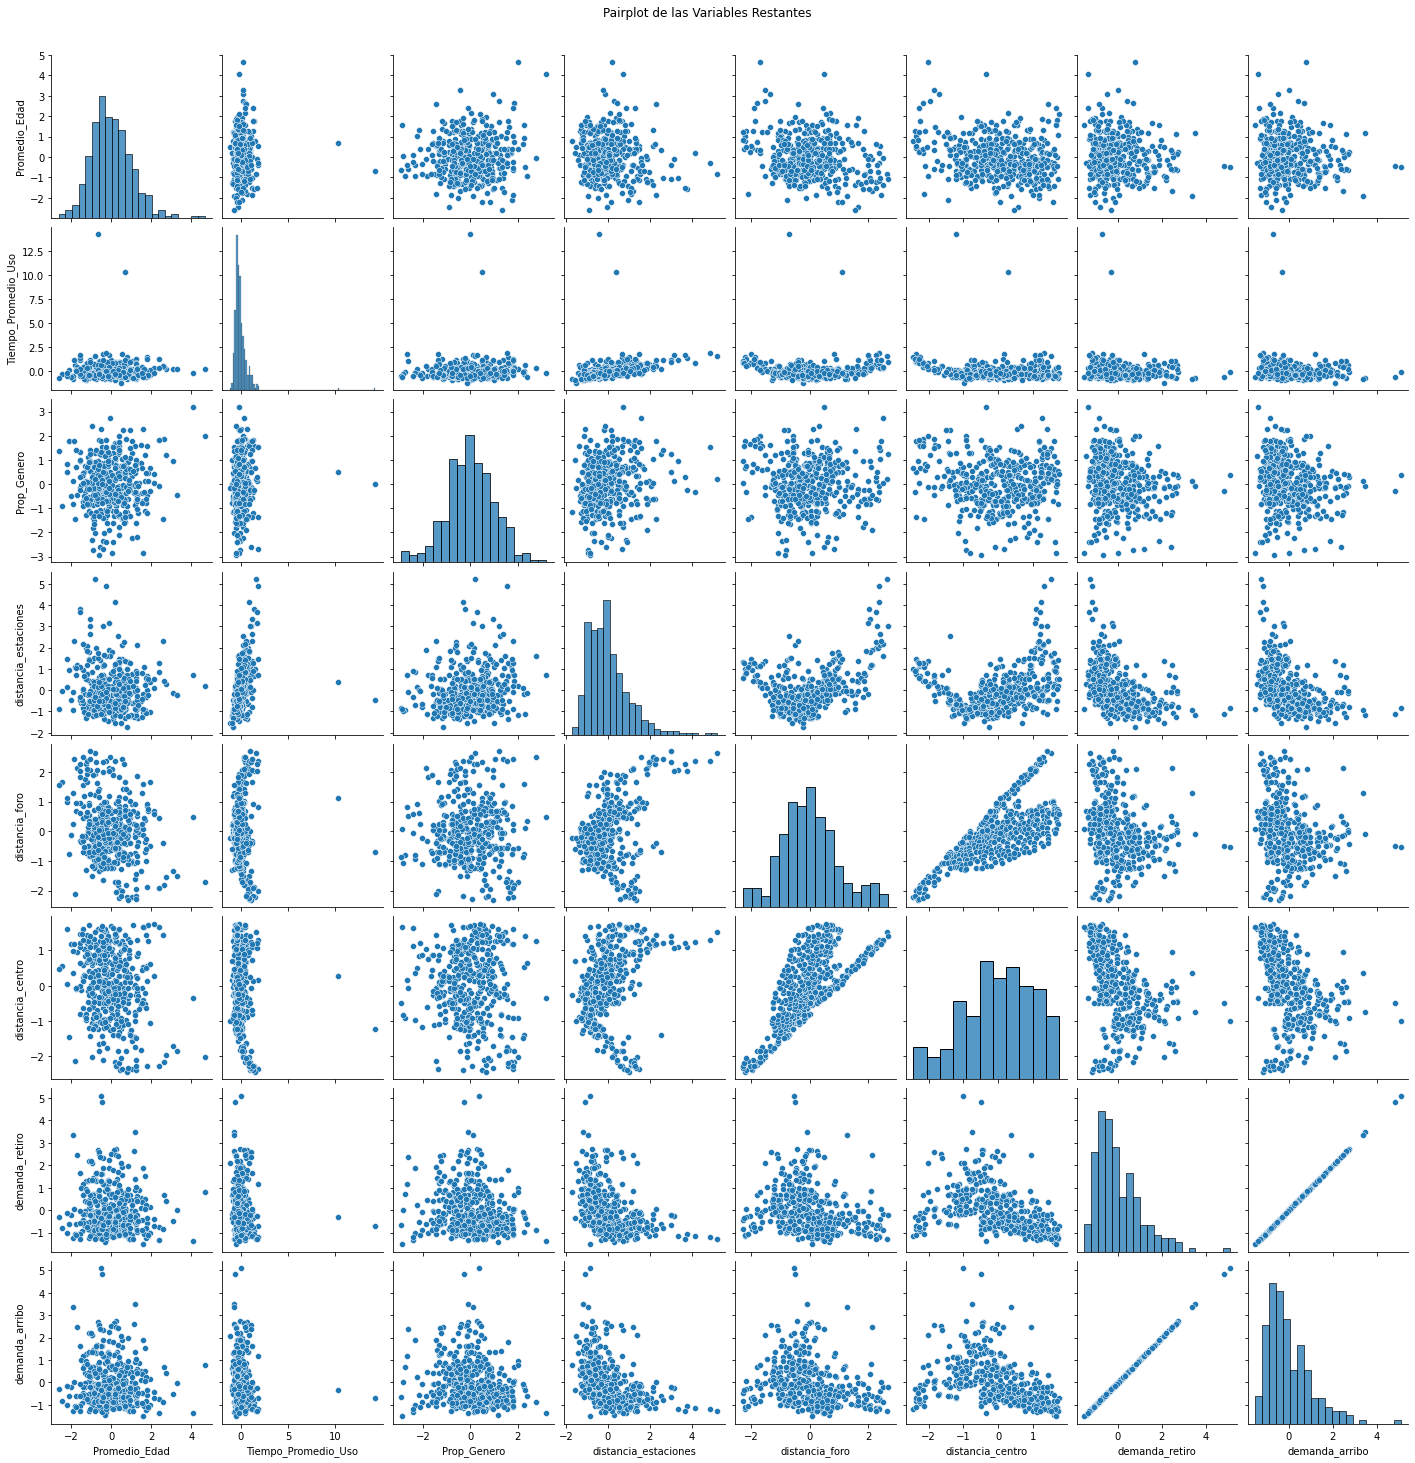

In [407]:

sns.pairplot(df_ts.drop(['Hora_Pico', 'Dia_Semana_Pico'], axis=1))
plt.suptitle('Pairplot de las Variables Restantes', y=1.02) 
plt.show()

## Clusters

## Kmeans

In [315]:
# Función para calcular el índice de Dunn
def dunn_index(X, labels):
    distances = pairwise_distances(X)
    clusters = np.unique(labels)
    min_intercluster_distance = np.inf
    for i in clusters:
        for j in clusters:
            if i != j:
                intercluster_distance = np.min(distances[labels == i, :][:, labels == j])
                min_intercluster_distance = min(min_intercluster_distance, intercluster_distance)
    max_intracluster_distance = 0
    for i in clusters:
        intracluster_distances = distances[labels == i, :][:, labels == i]
        max_intracluster_distance = max(max_intracluster_distance, np.max(intracluster_distances))
    return min_intercluster_distance / max_intracluster_distance



# Rango de número de clusters a evaluar
k_range = range(2, 11)

# Listas para almacenar los valores de las métricas
inercias = []
davies_bouldin_scores = []
silhouette_scores = []
dunn_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ts)
    labels = kmeans.labels_
    
    # Calculando las métricas
    inercias.append(kmeans.inertia_)
    davies_bouldin_scores.append(davies_bouldin_score(df_ts, labels))
    silhouette_scores.append(silhouette_score(df_ts, labels))
    dunn_scores.append(dunn_index(df_ts, labels))

# Preparando los resultados en un DataFrame para mejor visualización
resultados = pd.DataFrame({
    'Número de Clusters': k_range,
    'Inercia': inercias,
    'Índice de Davies-Bouldin': davies_bouldin_scores,
    'Coeficiente de Silueta': silhouette_scores,
    'Índice de Dunn': dunn_scores
})

resultados


,Número de Clusters,Inercia,Índice de Davies-Bouldin,Coeficiente de Silueta,Índice de Dunn
0,2,3431.578922,1.808672,0.201449,0.055438
1,3,3088.426137,1.903236,0.162308,0.044759
2,4,2746.363150,1.666833,0.177937,0.059077
3,5,2463.614474,1.377749,0.197633,0.122913
4,6,2252.573746,1.350843,0.199850,0.095452
5,7,2074.018794,1.463352,0.178584,0.092489
6,8,2018.737201,1.525586,0.172991,0.038049
7,9,1755.747462,1.375717,0.183433,0.069210
8,10,1667.379621,1.376773,0.182862,0.081070


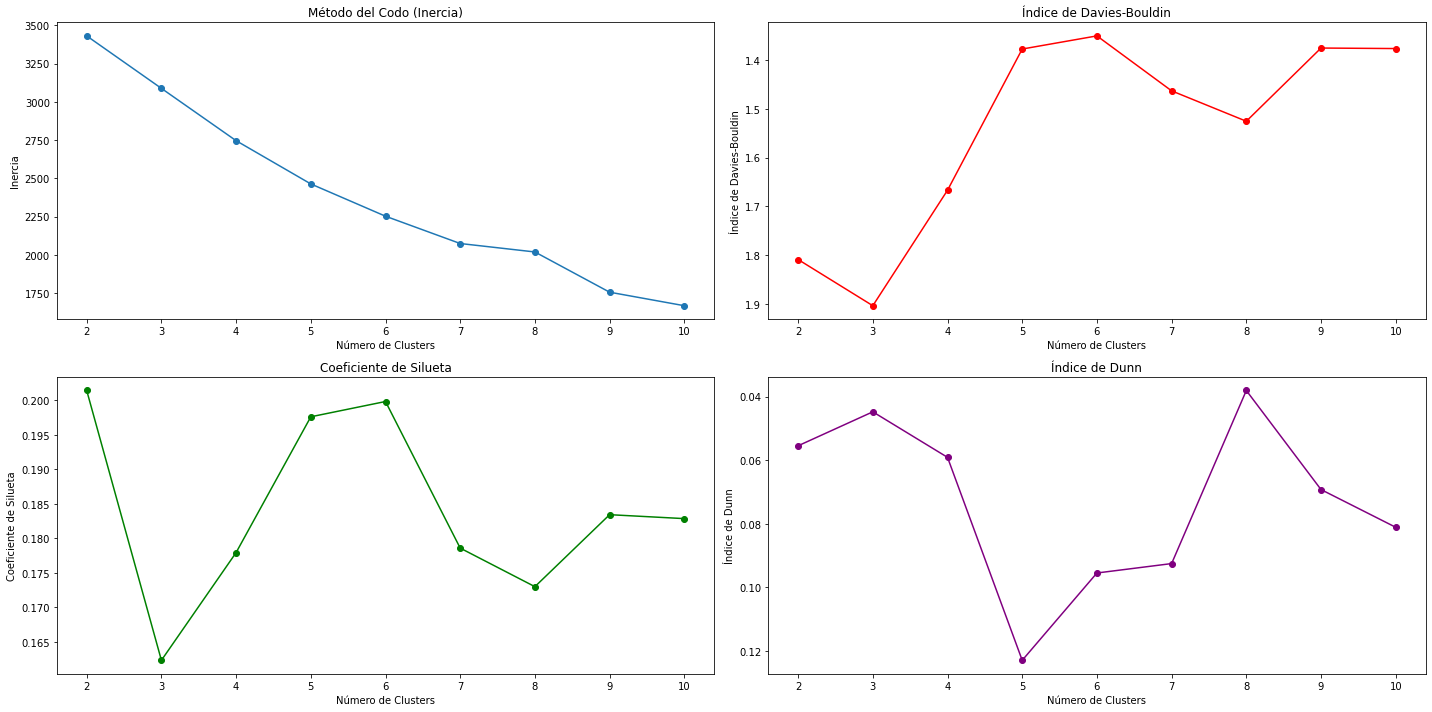

In [316]:

plt.figure(figsize=(20, 10))

# Inercia
plt.subplot(2, 2, 1)
plt.plot(resultados['Número de Clusters'], resultados['Inercia'], marker='o')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

# Índice de Davies-Bouldin
plt.subplot(2, 2, 2)
plt.plot(resultados['Número de Clusters'], resultados['Índice de Davies-Bouldin'], marker='o', color='red')
plt.title('Índice de Davies-Bouldin')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.gca().invert_yaxis()  # Invertir el eje y para que valores menores sean mejores

# Coeficiente de Silueta
plt.subplot(2, 2, 3)
plt.plot(resultados['Número de Clusters'], resultados['Coeficiente de Silueta'], marker='o', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')

# Índice de Dunn
plt.subplot(2, 2, 4)
plt.plot(resultados['Número de Clusters'], resultados['Índice de Dunn'], marker='o', color='purple')
plt.title('Índice de Dunn')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Dunn')
plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()


In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_ts)
labels = kmeans.labels_

df_ts['Cluster'] = labels

In [50]:
def plot_cluster(X_scaled, labels, algorithm):
    alg = algorithm(n_components=2)
    X_alg = alg.fit_transform(X_scaled)
    alg_res = pd.DataFrame(X_alg, columns=['c1', 'c2'])
    alg_res = alg_res.join(df)
    palette = 'colorblind'

    sns.scatterplot(
        x='c1',
        y='c2',
        hue=labels,
        data=alg_res,
        palette = palette
    )
    plt.show()

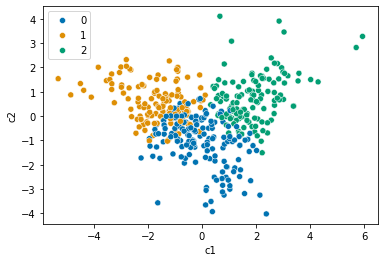

In [428]:
plot_cluster(df_ts, labels, PCA)

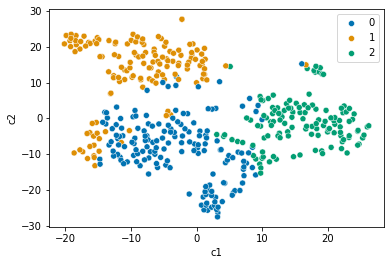

In [388]:
plot_cluster(df_ts, labels, TSNE)

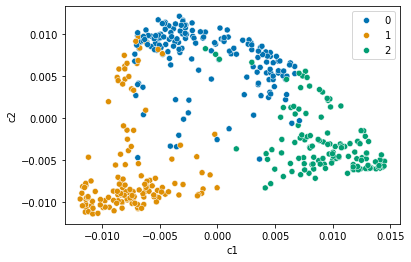

In [429]:
plot_cluster(df_ts, labels, SpectralEmbedding)

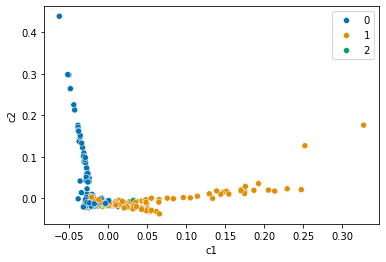

In [430]:
plot_cluster(df_ts, labels, LocallyLinearEmbedding)

<Figure size 720x432 with 0 Axes>

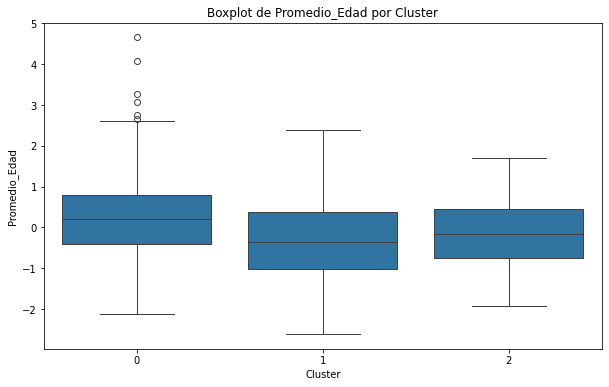

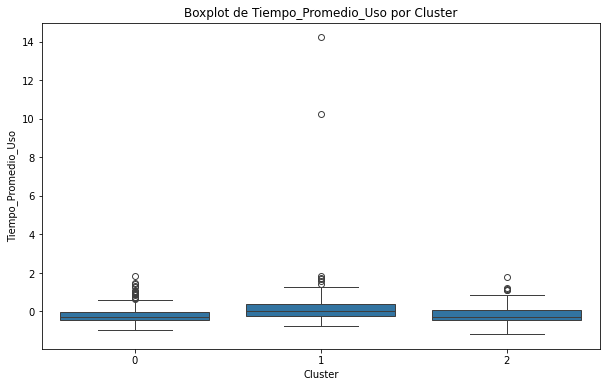

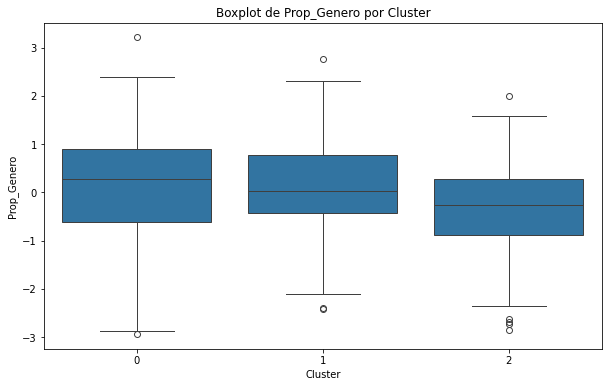

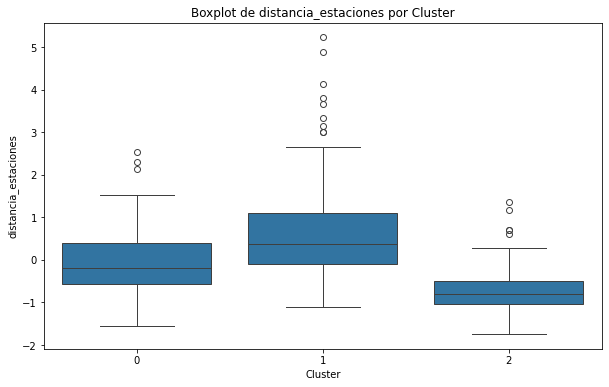

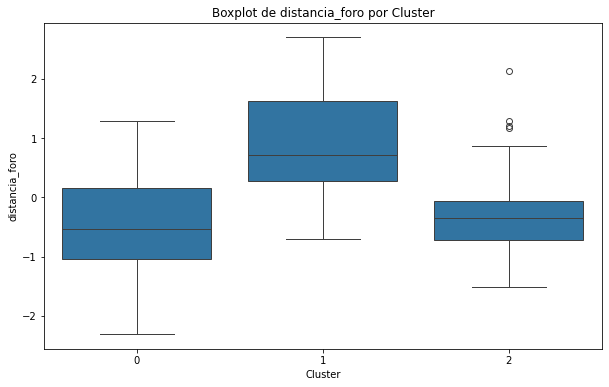

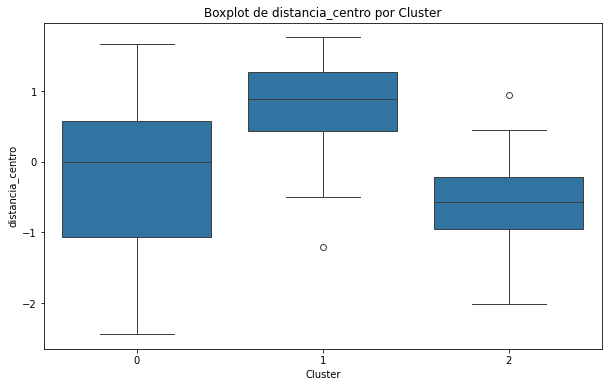

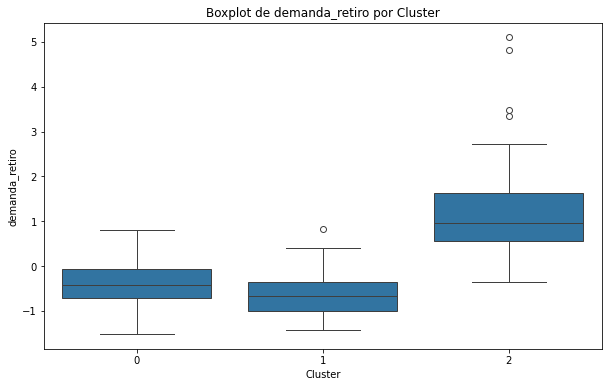

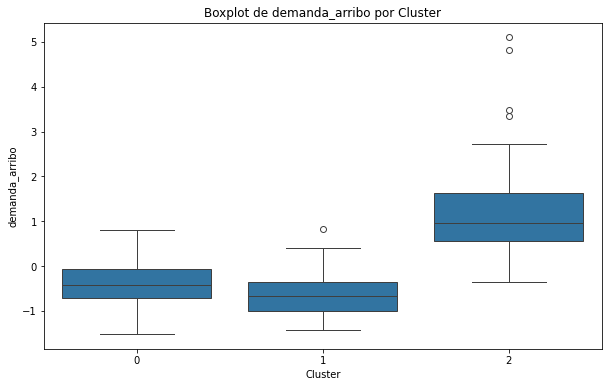

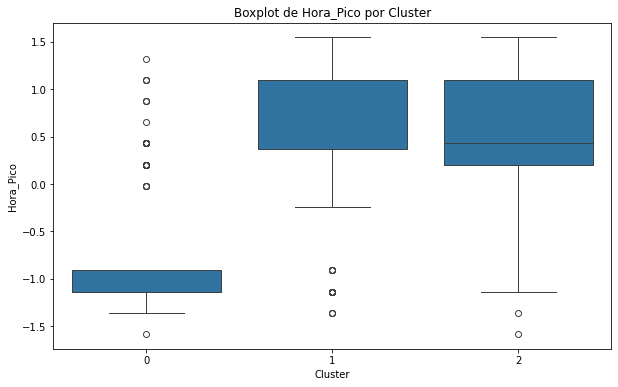

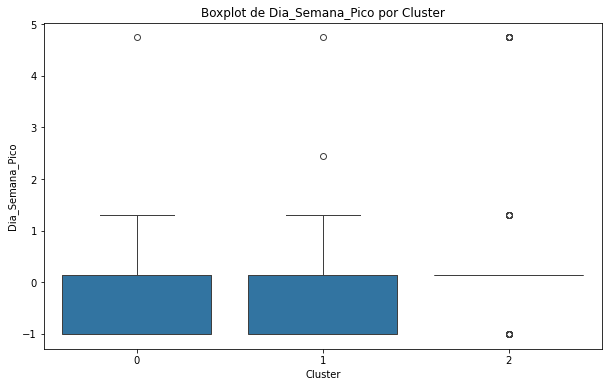

In [36]:
def plot_cluster_boxplots(data, cluster_col):
    
    
    plt.figure(figsize=(10, 6))

   
    for column in data.columns:
        if column != cluster_col:  
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=cluster_col, y=column, data=data)
            plt.title(f'Boxplot de {column} por Cluster')
            plt.show()

plot_cluster_boxplots(df_ts, 'Cluster')

## Spectral Clustering

In [339]:
k_range = range(2, 11)

# Listas para almacenar los valores de las métricas
davies_bouldin_scores = []
silhouette_scores = []
dunn_scores = []

for k in k_range:
    # Aplicando Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, assign_labels="discretize", random_state=42, affinity='nearest_neighbors')
    labels = spectral.fit_predict(df_ts)
    
    # Calculando las métricas
    davies_bouldin_scores.append(davies_bouldin_score(df_ts, labels))
    silhouette_scores.append(silhouette_score(df_ts, labels))
    dunn_scores.append(dunn_index(df_ts, labels))

# Preparando los resultados en un DataFrame para mejor visualización
resultados = pd.DataFrame({
    'Número de Clusters': k_range,
    'Índice de Davies-Bouldin': davies_bouldin_scores,
    'Coeficiente de Silueta': silhouette_scores,
    'Índice de Dunn': dunn_scores
})
resultados

,Número de Clusters,Índice de Davies-Bouldin,Coeficiente de Silueta,Índice de Dunn
0,2,1.939878,0.170585,0.049141
1,3,1.976214,0.167658,0.076295
2,4,1.674030,0.187450,0.077330
3,5,1.691600,0.190053,0.044380
4,6,1.474679,0.196279,0.044380
5,7,1.598354,0.167778,0.044380
6,8,1.552643,0.162191,0.044380
7,9,1.548634,0.164523,0.036975
8,10,1.565527,0.160678,0.036975


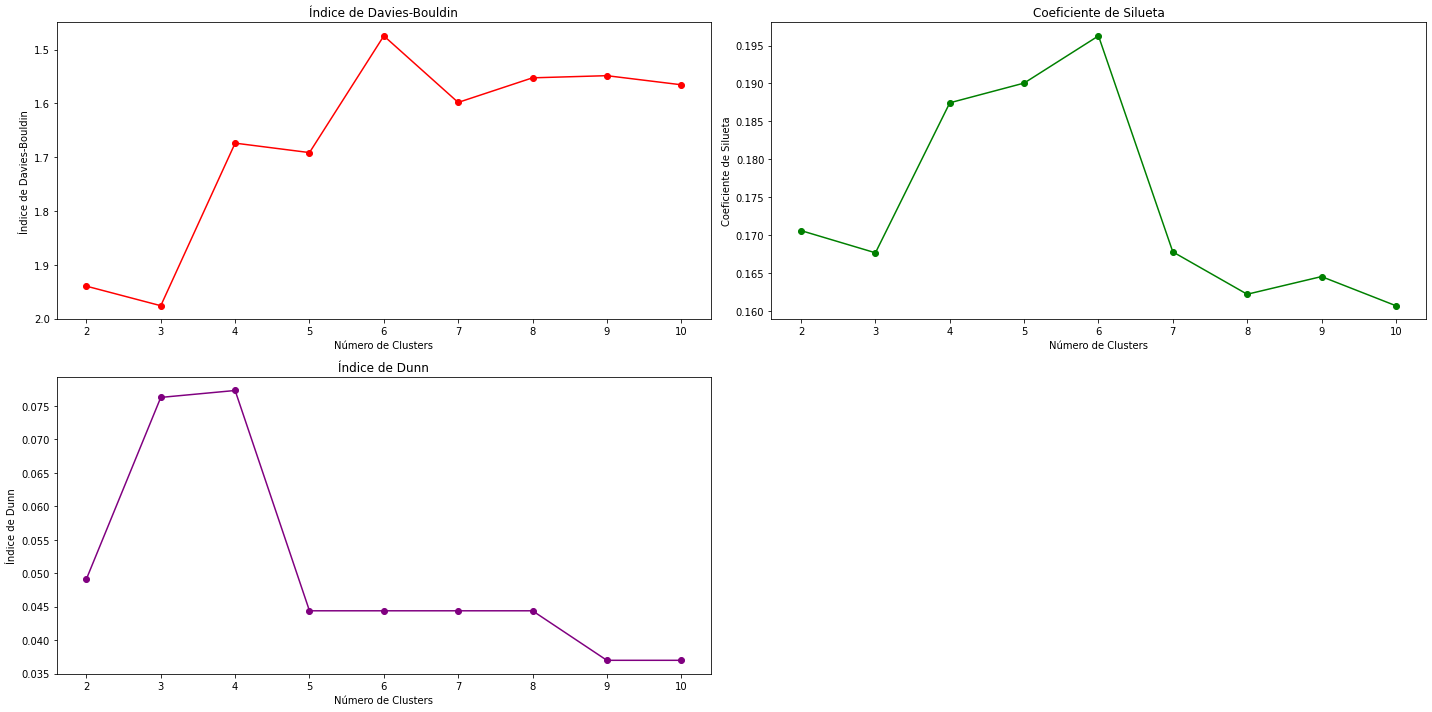

In [340]:
# Visualización de las métricas
plt.figure(figsize=(20, 10))

# Índice de Davies-Bouldin
plt.subplot(2, 2, 1)
plt.plot(resultados['Número de Clusters'], resultados['Índice de Davies-Bouldin'], marker='o', color='red')
plt.title('Índice de Davies-Bouldin')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.gca().invert_yaxis()  # Invertir el eje y para que valores menores sean mejores

# Coeficiente de Silueta
plt.subplot(2, 2, 2)
plt.plot(resultados['Número de Clusters'], resultados['Coeficiente de Silueta'], marker='o', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')

# Índice de Dunn
plt.subplot(2, 2, 3)
plt.plot(resultados['Número de Clusters'], resultados['Índice de Dunn'], marker='o', color='purple')
plt.title('Índice de Dunn')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Dunn')

plt.tight_layout()
plt.show()

In [37]:
spectral = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=42, affinity='nearest_neighbors')
labels = spectral.fit_predict(df_ts)
df_ts['Cluster_spectral'] = labels

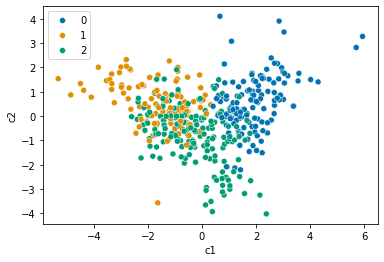

In [390]:
plot_cluster(df_ts, labels, PCA)

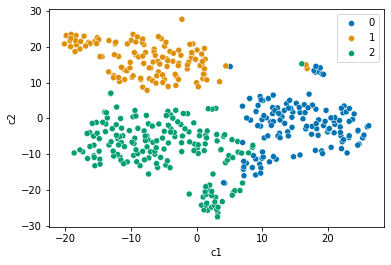

In [391]:
plot_cluster(df_ts, labels, TSNE)

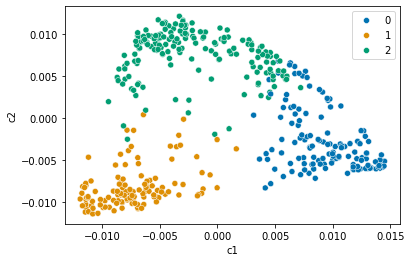

In [432]:
plot_cluster(df_ts, labels, SpectralEmbedding)

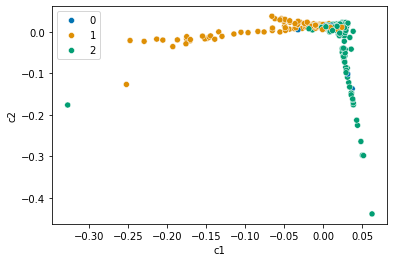

In [433]:
plot_cluster(df_ts, labels, LocallyLinearEmbedding)

<Figure size 720x432 with 0 Axes>

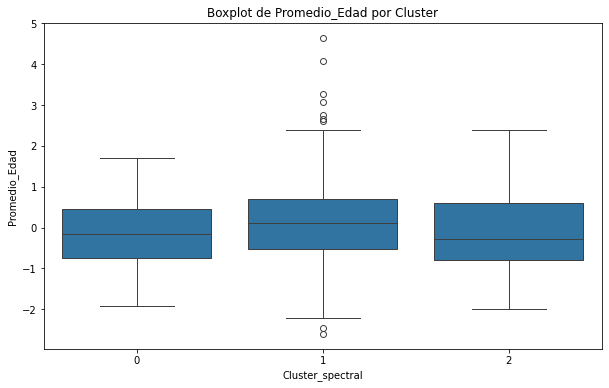

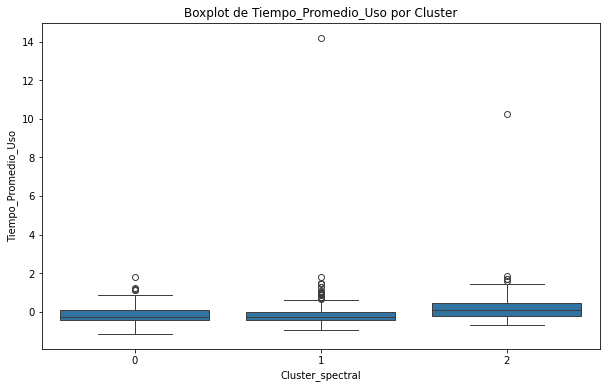

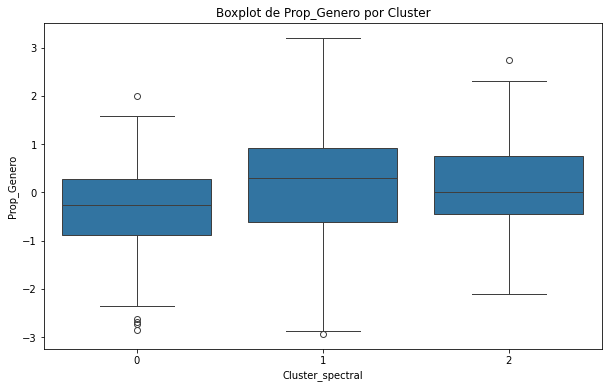

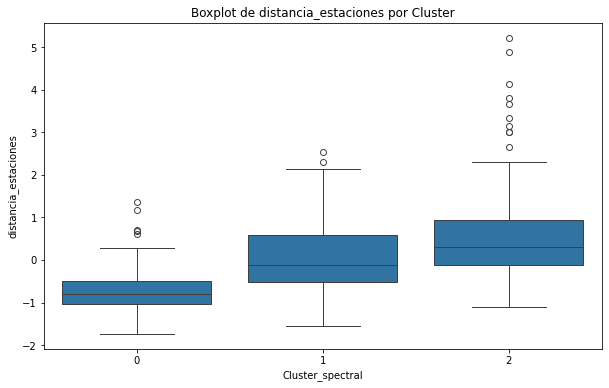

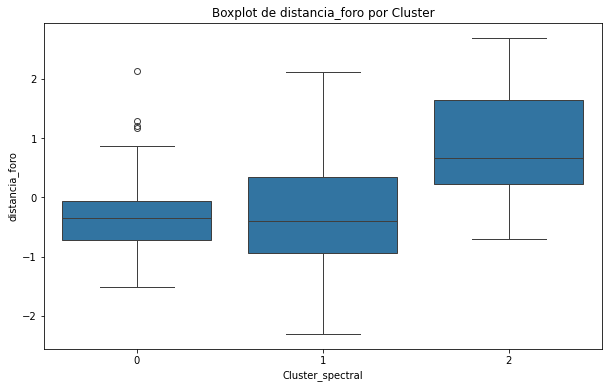

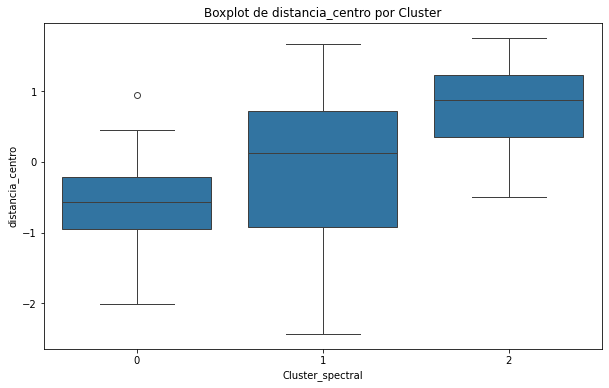

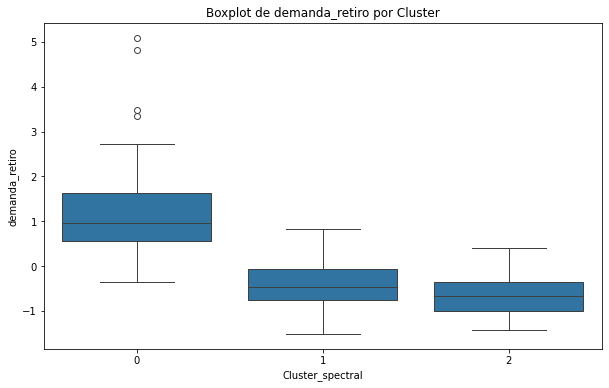

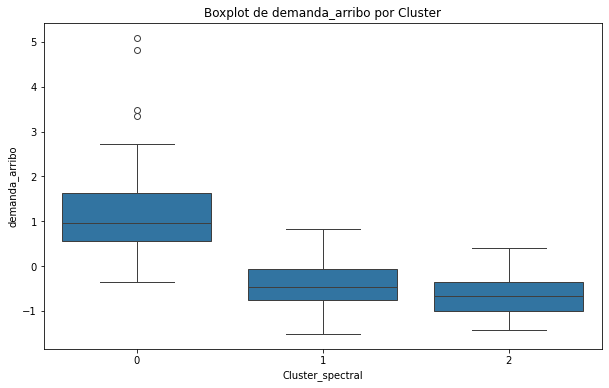

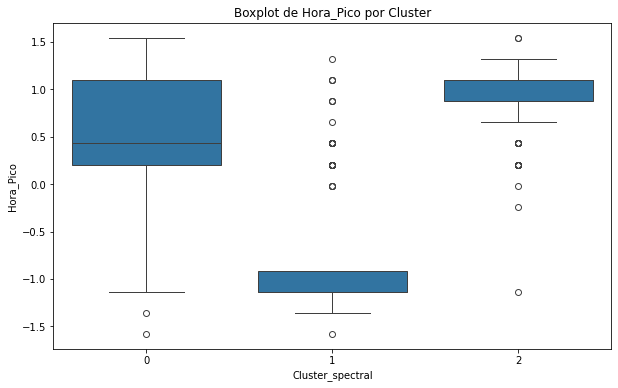

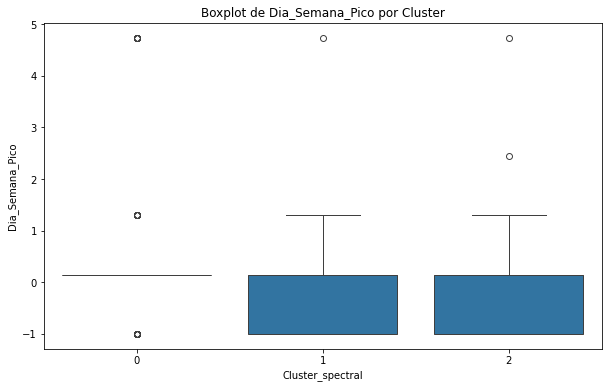

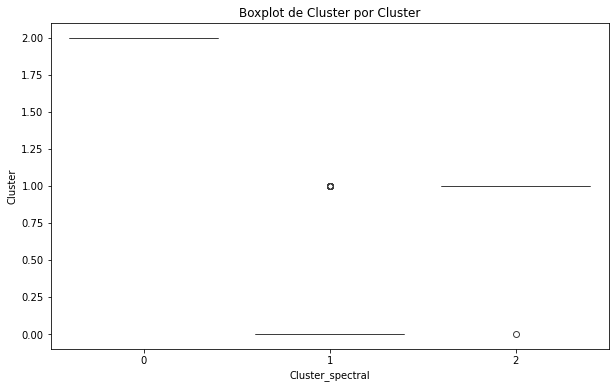

In [38]:
plot_cluster_boxplots(df_ts, 'Cluster_spectral')

## Cluster Jerarquico 

In [40]:
Z = linkage(df_ts, method='ward')

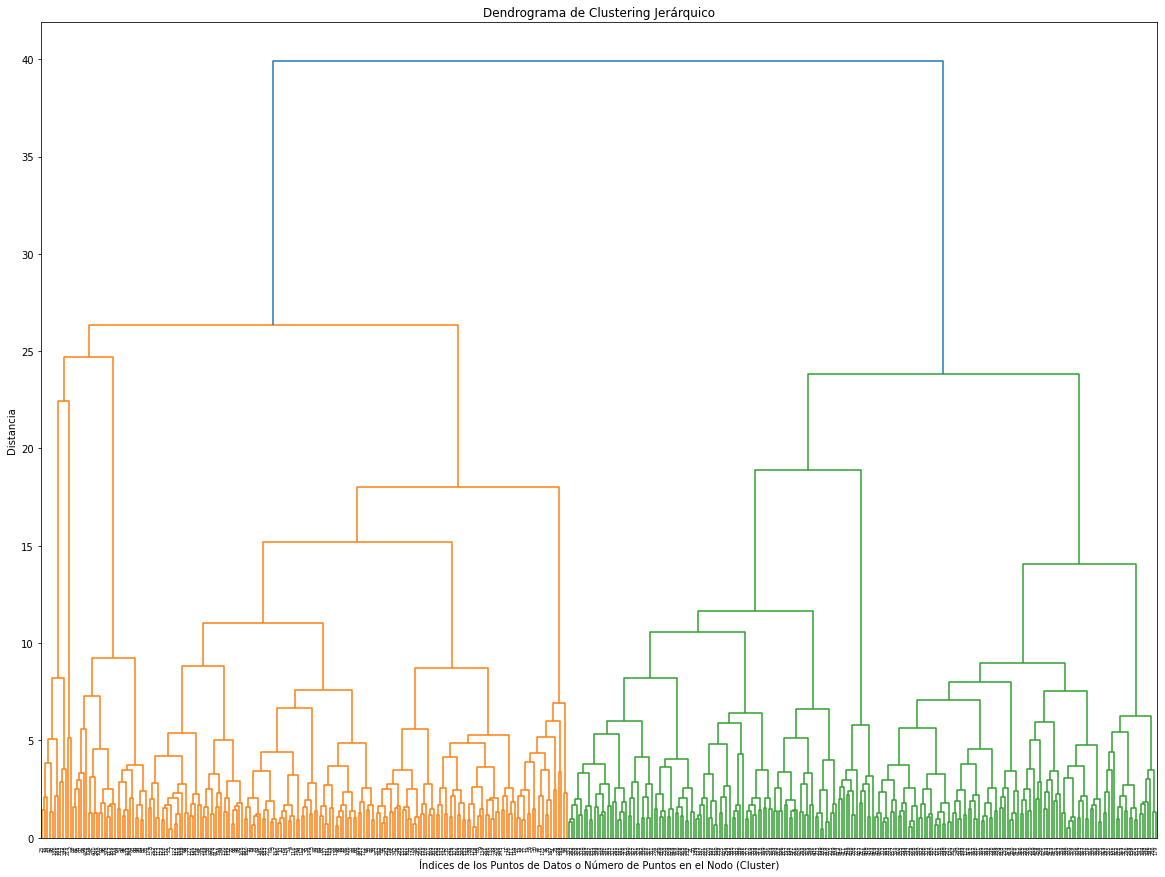

In [393]:

plt.figure(figsize=(20, 15))
dendrogram(Z,
           orientation='top', 
           distance_sort='descending',
           show_leaf_counts=True)  
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de los Puntos de Datos o Número de Puntos en el Nodo (Cluster)')
plt.ylabel('Distancia')
plt.show()

In [41]:
altura_corte = 25

labels = fcluster(Z, altura_corte, criterion='distance')
df_ts['Cluster_H'] = labels

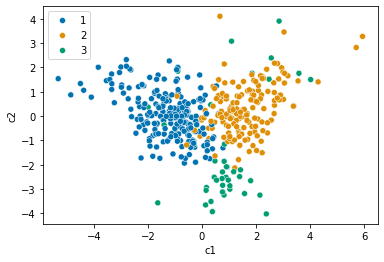

In [405]:
plot_cluster(df_ts, labels, PCA)

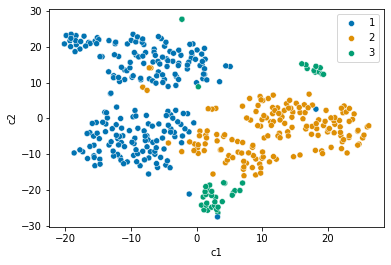

In [406]:
plot_cluster(df_ts, labels, TSNE)

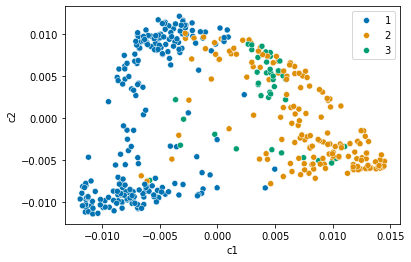

In [436]:
plot_cluster(df_ts, labels, SpectralEmbedding)

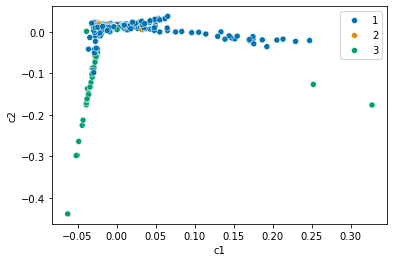

In [437]:
plot_cluster(df_ts, labels, LocallyLinearEmbedding)

<Figure size 720x432 with 0 Axes>

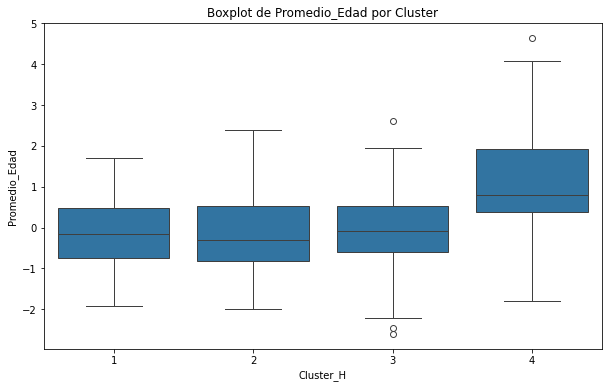

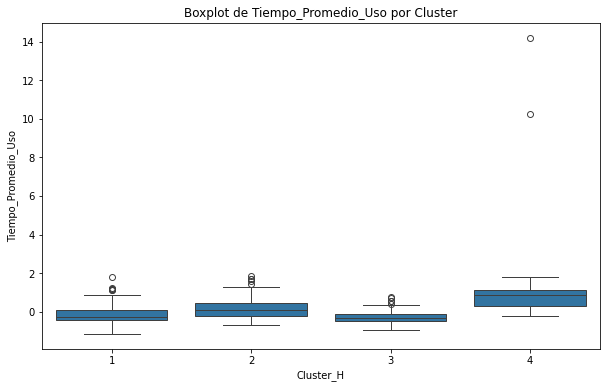

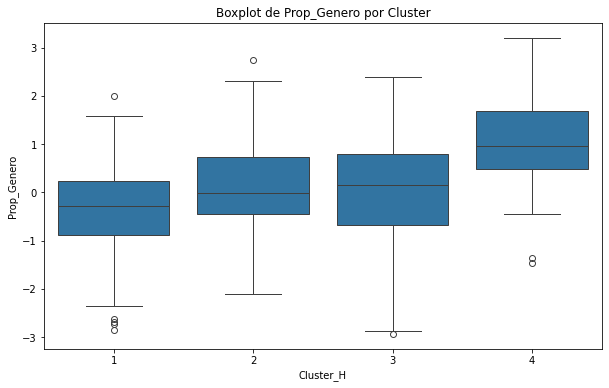

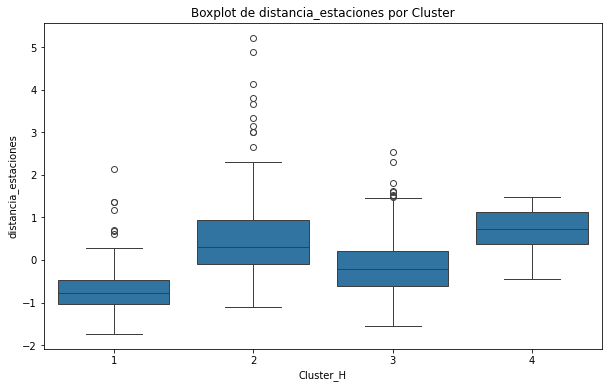

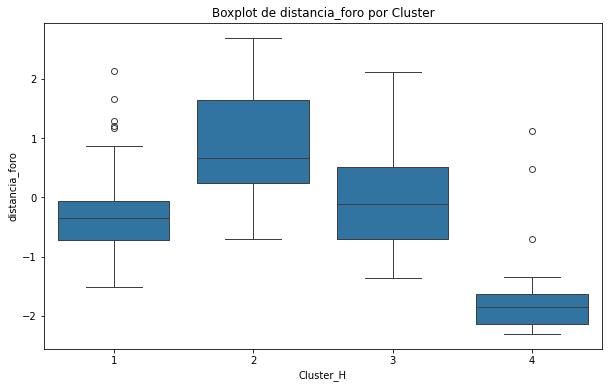

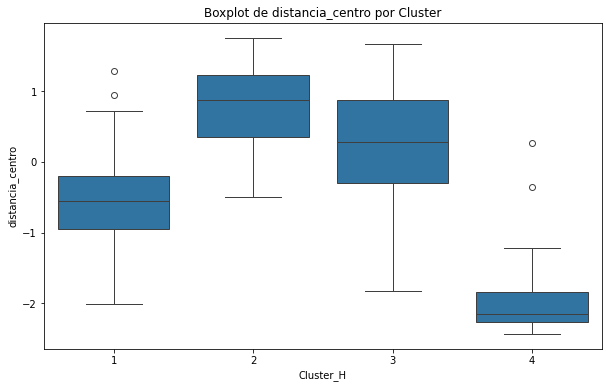

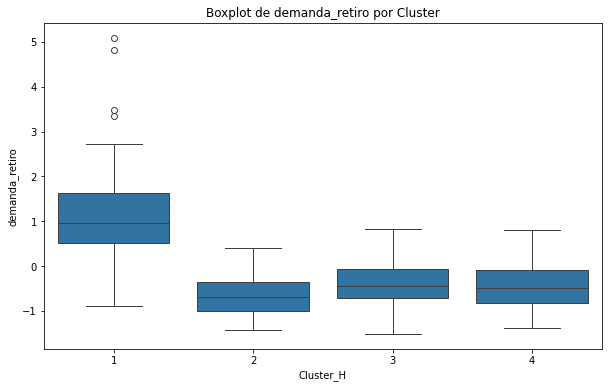

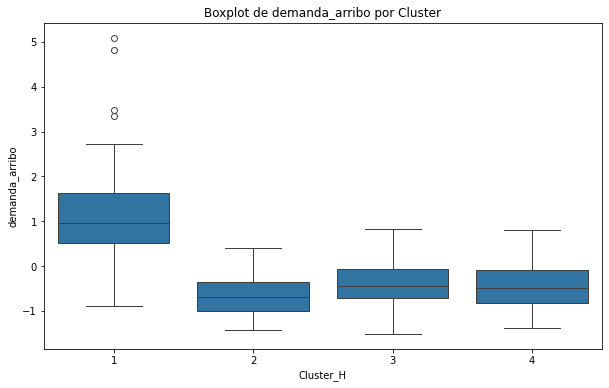

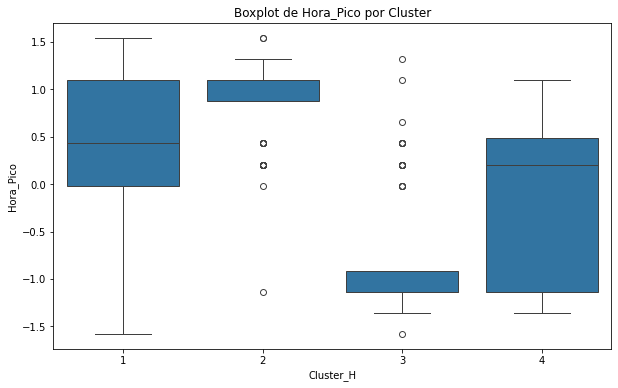

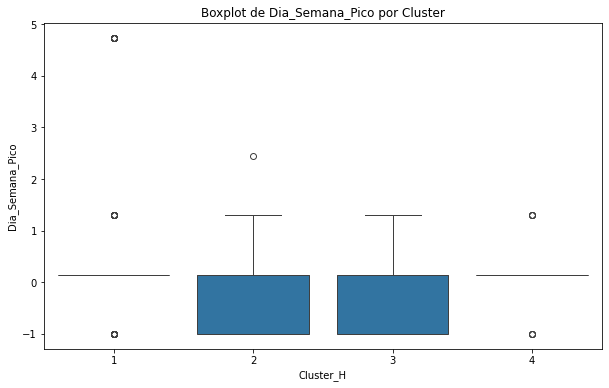

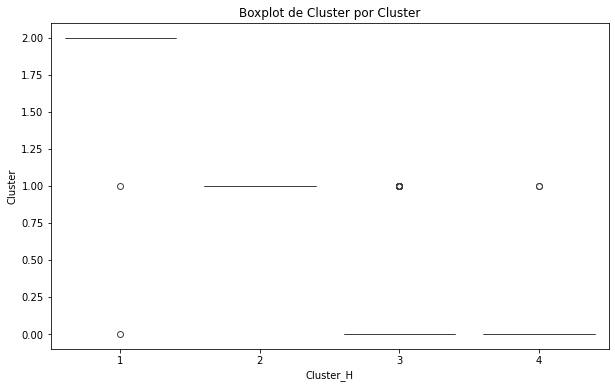

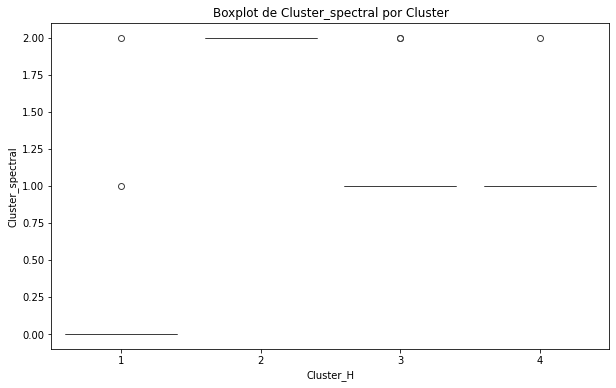

In [42]:
plot_cluster_boxplots(df_ts, 'Cluster_H')

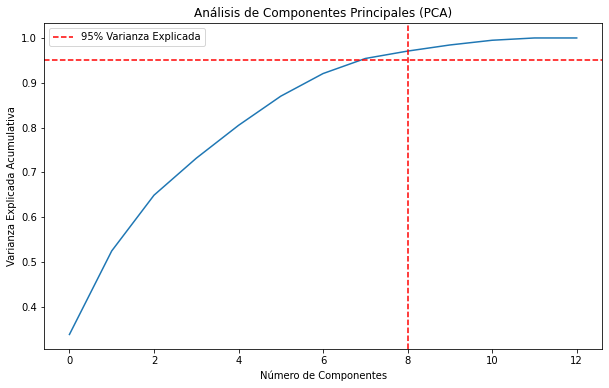

,Número de Clusters,Inercia,Índice de Davies-Bouldin,Coeficiente de Silueta
0,2,3680.563498,1.208532,0.312043
1,3,2885.595312,1.416608,0.301008
2,4,2532.033518,1.324645,0.307174
3,5,2411.569389,1.662219,0.225263
4,6,2223.458080,1.774829,0.191086
5,7,2148.078681,1.822548,0.176338
6,8,2063.939050,1.759750,0.166031
7,9,1973.341744,1.738970,0.174607
8,10,1882.561767,1.715834,0.177635


In [43]:
power_transformer = PowerTransformer()
df_ts_transformed = power_transformer.fit_transform(df_ts)

# Ahora aplicamos PCA
pca = PCA().fit(df_ts_transformed)


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA)')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza Explicada')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1, color='r', linestyle='--')
plt.legend(loc='best')
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Aplicar PCA con el número de componentes seleccionado
pca = PCA(n_components=n_components)
df_ts_pca = pca.fit_transform(df_ts_transformed)

# Ahora procedemos con KMeans con el rango de número de clusters previamente definido
k_range = range(2, 11)

# Listas para almacenar los valores de las métricas para KMeans después de PCA
inercias = []
davies_bouldin_scores = []
silhouette_scores = []
dunn_scores=[]
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ts_pca)
    labels = kmeans.labels_
    
    # Calculando las métricas
    inercias.append(kmeans.inertia_)
    davies_bouldin_scores.append(davies_bouldin_score(df_ts_pca, labels))
    silhouette_scores.append(silhouette_score(df_ts_pca, labels))

# Preparando los resultados en un DataFrame para mejor visualización
resultados = pd.DataFrame({
    'Número de Clusters': k_range,
    'Inercia': inercias,
    'Índice de Davies-Bouldin': davies_bouldin_scores,
    'Coeficiente de Silueta': silhouette_scores
})

resultados

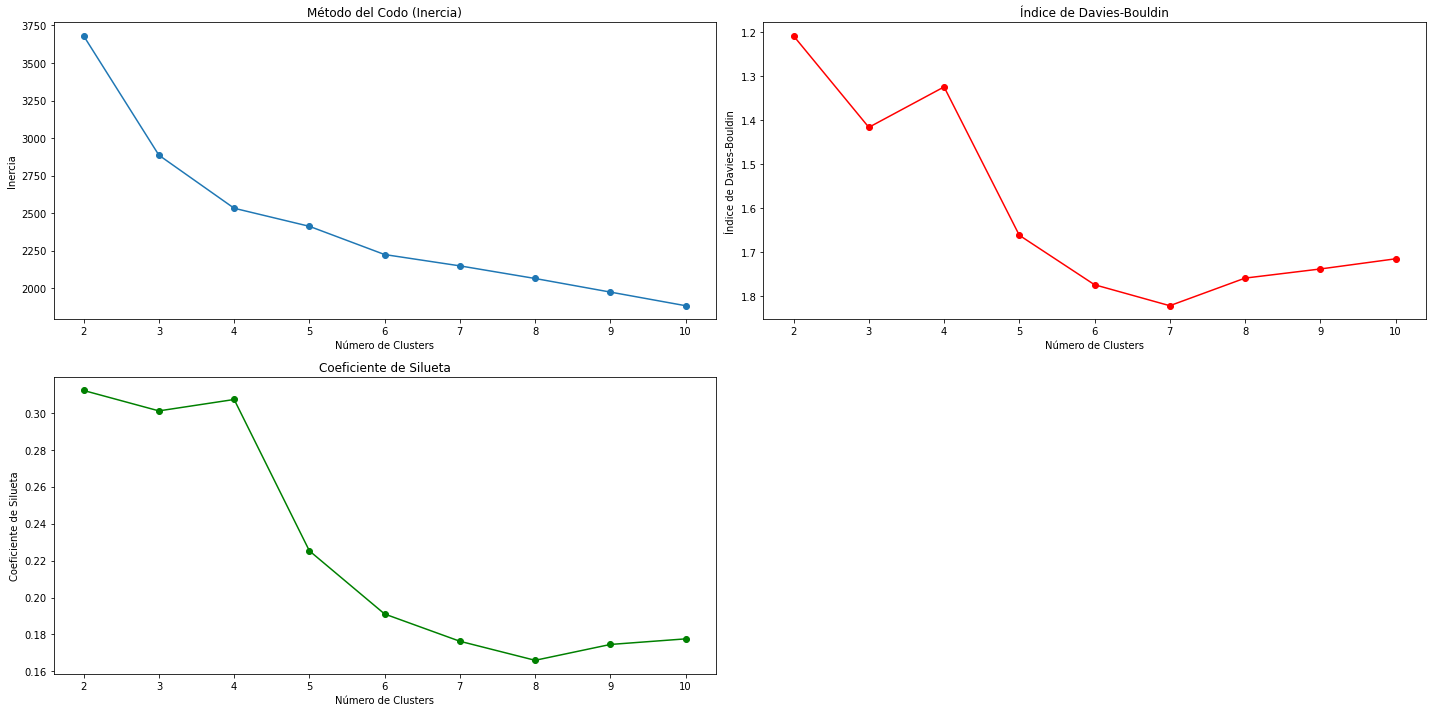

In [44]:
plt.figure(figsize=(20, 10))

# Inercia
plt.subplot(2, 2, 1)
plt.plot(resultados['Número de Clusters'], resultados['Inercia'], marker='o')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

# Índice de Davies-Bouldin
plt.subplot(2, 2, 2)
plt.plot(resultados['Número de Clusters'], resultados['Índice de Davies-Bouldin'], marker='o', color='red')
plt.title('Índice de Davies-Bouldin')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.gca().invert_yaxis()  # Invertir el eje y para que valores menores sean mejores

# Coeficiente de Silueta
plt.subplot(2, 2, 3)
plt.plot(resultados['Número de Clusters'], resultados['Coeficiente de Silueta'], marker='o', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')



plt.tight_layout()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_ts)
labels = kmeans.labels_
df_ts['Cluster_kmeansv2'] = labels

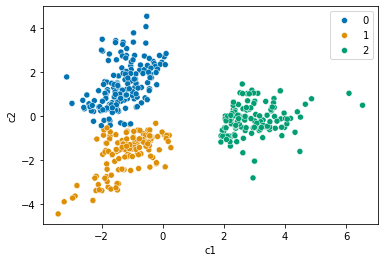

In [51]:
plot_cluster(df_ts, labels, PCA)

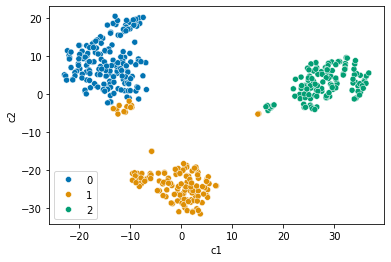

In [53]:
plot_cluster(df_ts, labels, TSNE)

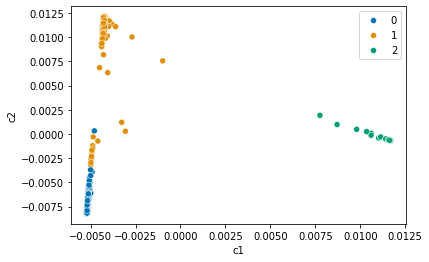

In [54]:
plot_cluster(df_ts, labels, SpectralEmbedding)

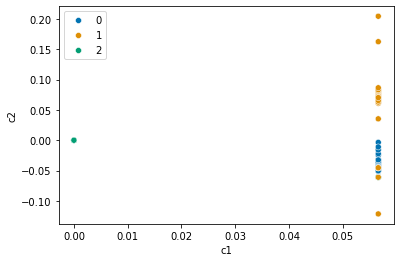

In [55]:
plot_cluster(df_ts, labels, LocallyLinearEmbedding)

<Figure size 720x432 with 0 Axes>

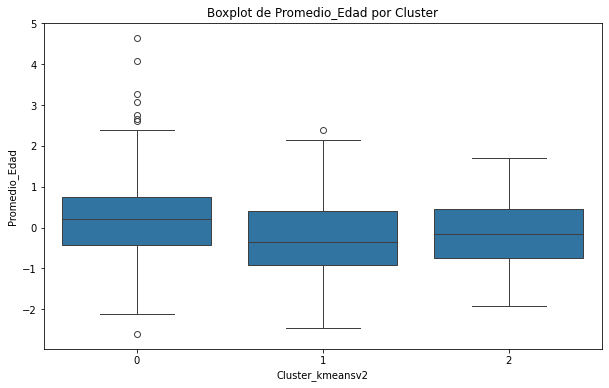

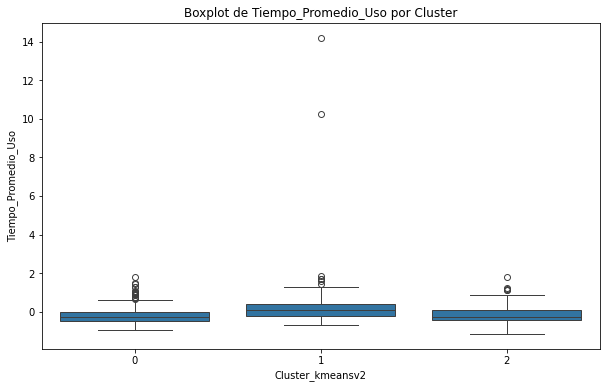

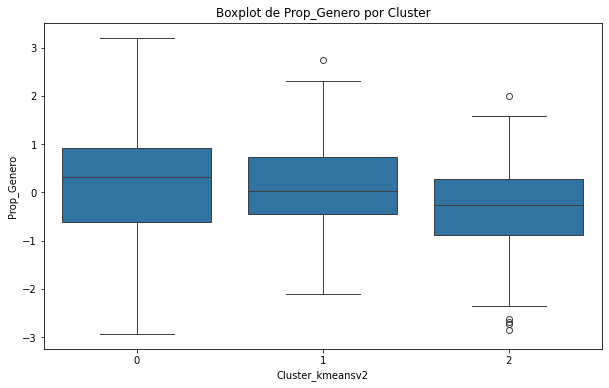

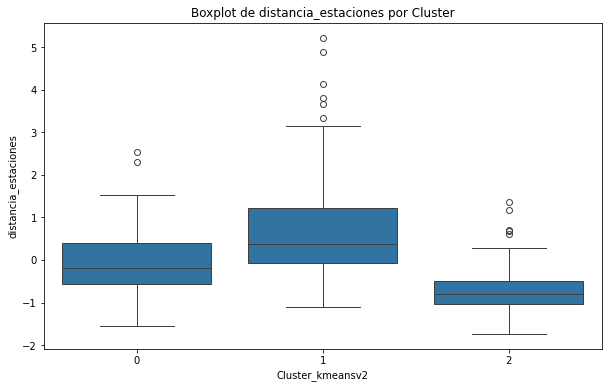

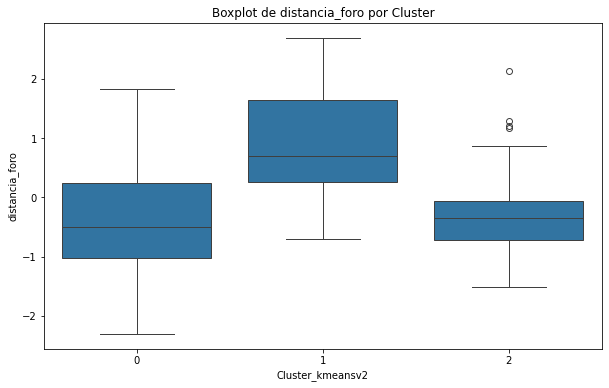

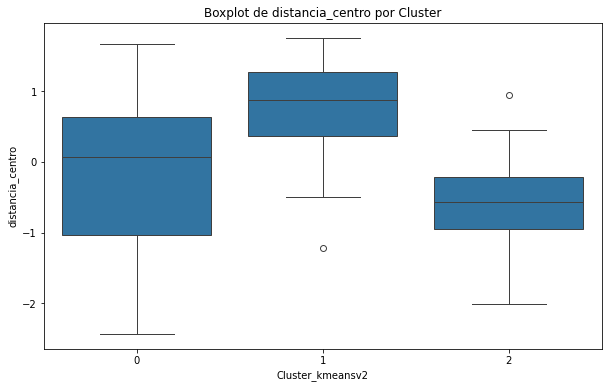

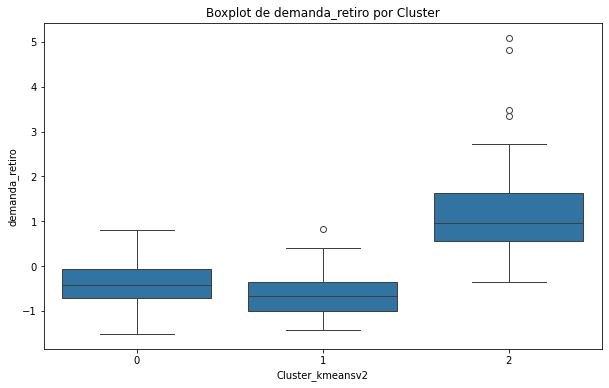

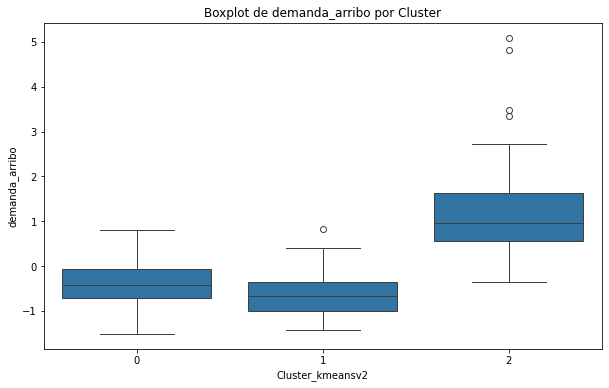

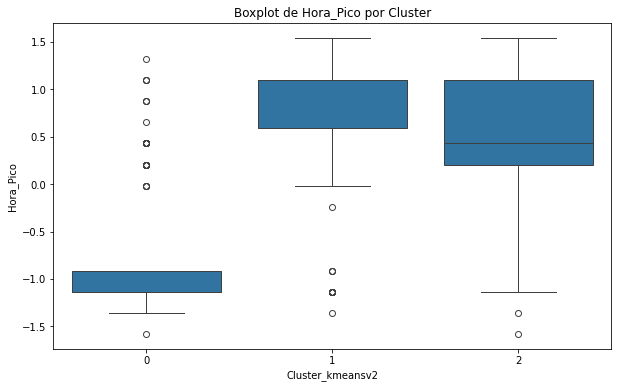

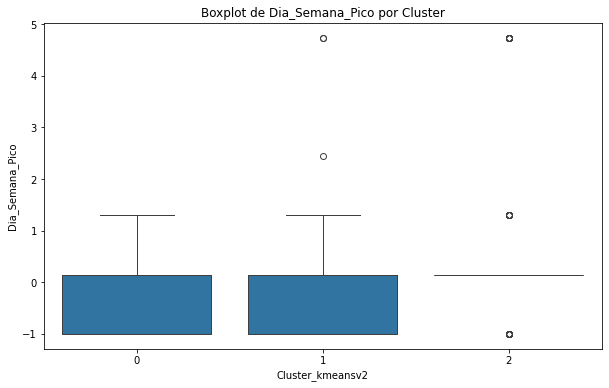

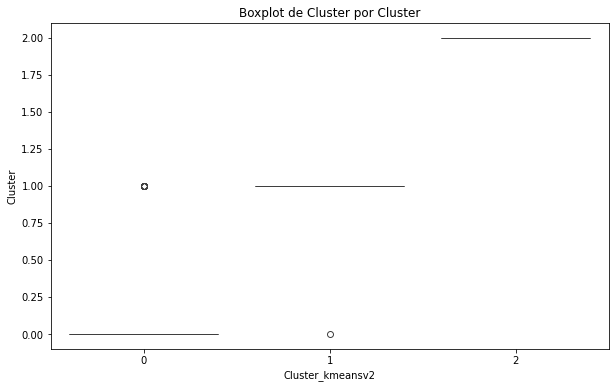

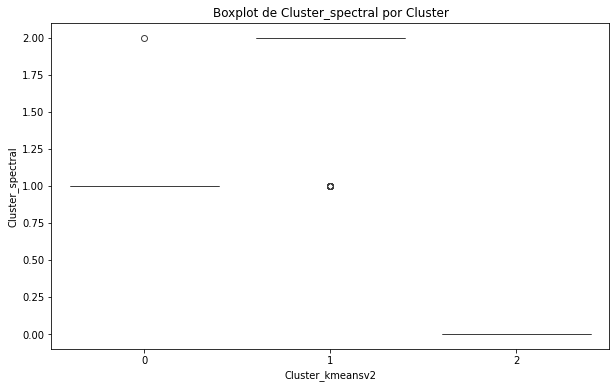

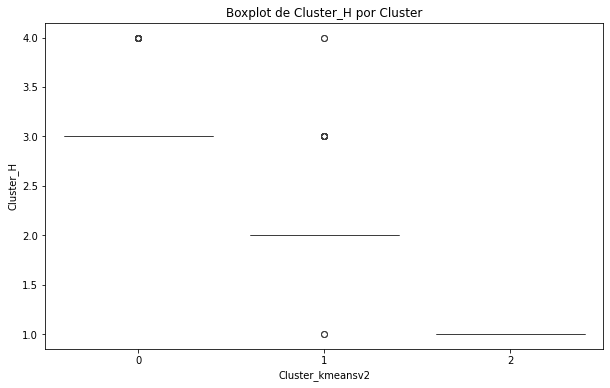

In [56]:
plot_cluster_boxplots(df_ts, 'Cluster_kmeansv2')